importing required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

let's load the image

In [55]:
image = cv2.imread('resources/image1.jpg')
cv2.imshow('Image', image)

# Wait indefinitely for a key press
cv2.waitKey(0)

# Destroy all the windows opened by OpenCV
cv2.destroyAllWindows()

let's resize the image

In [7]:
def smaller(input_image, new_height):
    height, width, channels = input_image.shape
    new_width = int((width * new_height) /height) 
    
    return cv2.resize(input_image, (new_width, new_height))

small_image = smaller(image, 400)
cv2.imshow("Resized Image", small_image)


cv2.waitKey(0)
cv2.destroyAllWindows()

let's show this using matplotlib

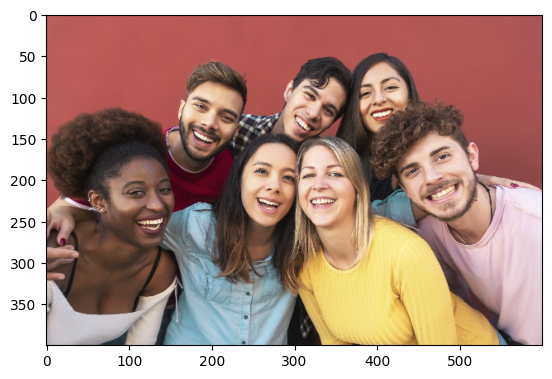

In [21]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
small_image_rgb = cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB)
plt.imshow(small_image_rgb)
plt.show()

Let's start the filtering with Gaussian Blur

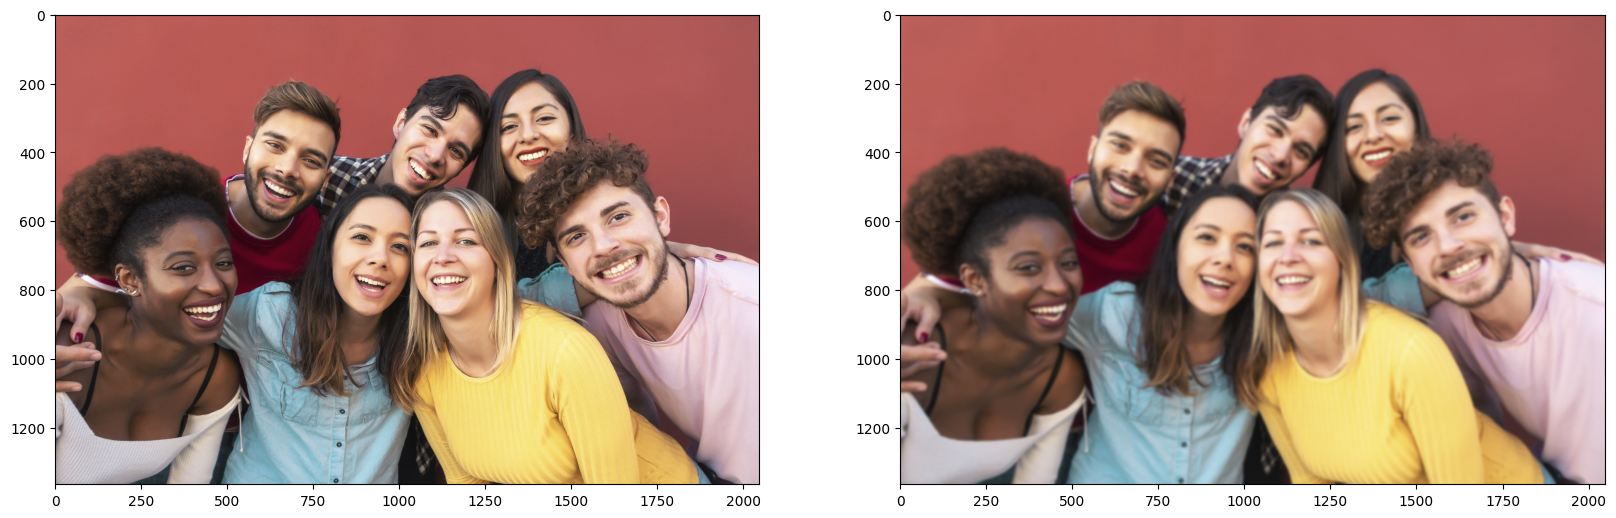

In [35]:
gaussian_blur_image = cv2.GaussianBlur(image, (19, 19), 0) # kernal size must always be a odd numbers.
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image_rgb)
axs[1].imshow(gaussian_blur_rgb)
plt.show()


now let's do box blur or average filtering

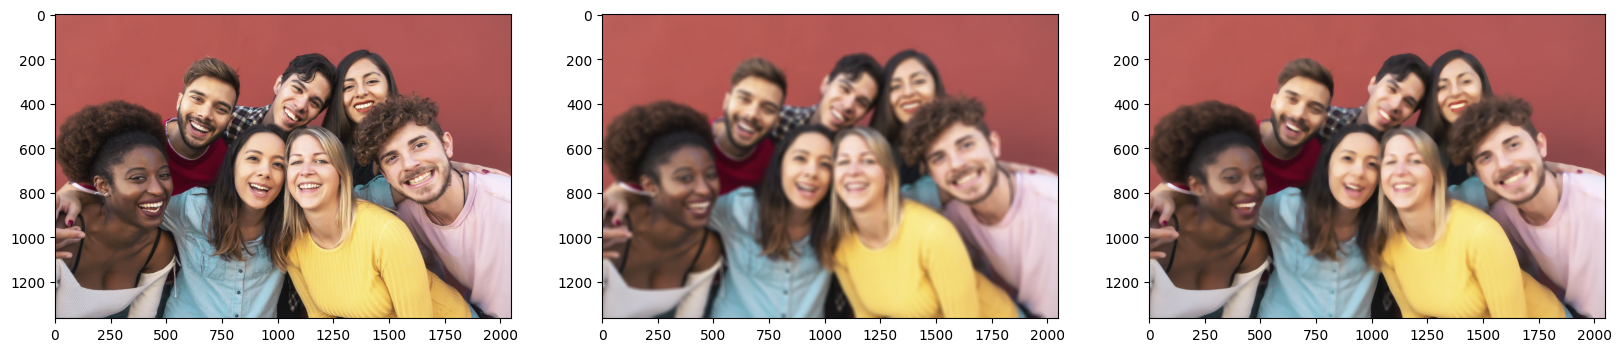

In [39]:
blur_image = cv2.blur(image, (19, 19))
blur_rgb = cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB)

median_blur_image = cv2.medianBlur(image, 19)
median_blur_rgb = cv2.cvtColor(median_blur_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(image_rgb)
axs[1].imshow(blur_rgb)
axs[2].imshow(median_blur_rgb)
plt.show()

sharpening with cv2.filter2D()

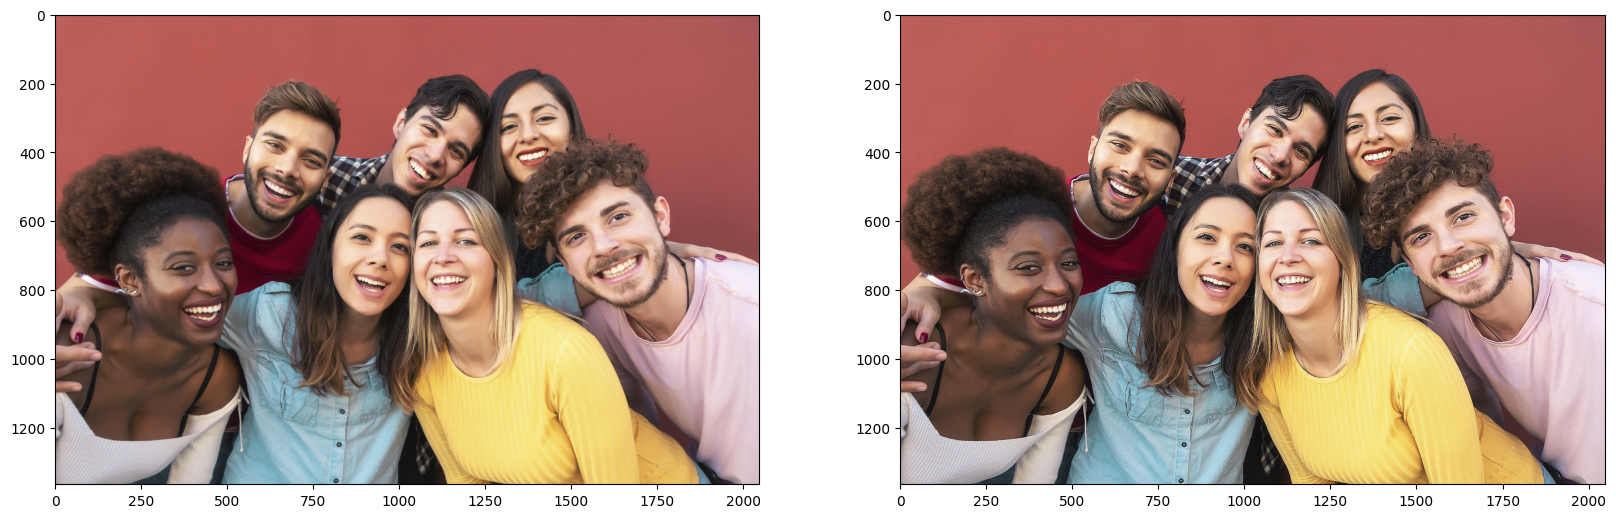

In [43]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

sharp_image = cv2.filter2D(image, -1, kernel)
sharp_rgb = cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image_rgb)
axs[1].imshow(sharp_rgb)
plt.show()


Let's detect edges with cv2.filter2D

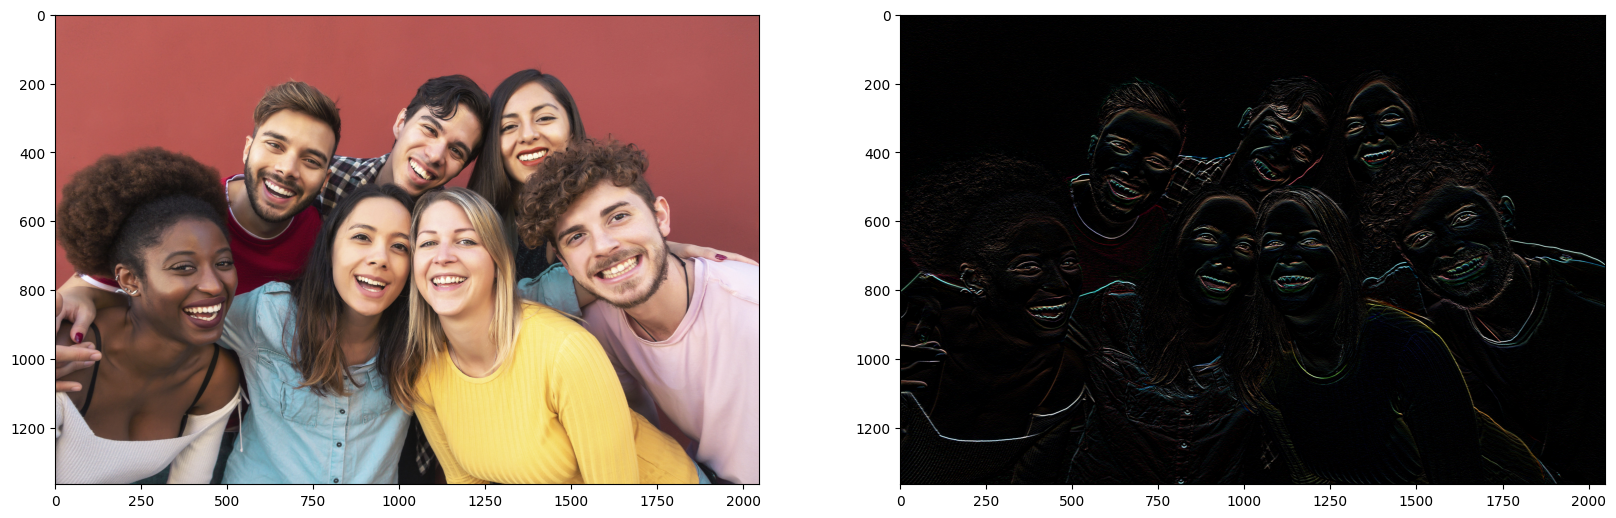

In [44]:
kernel = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

edge_image = cv2.filter2D(image, -1, kernel)
edge_rgb = cv2.cvtColor(edge_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image_rgb)
axs[1].imshow(edge_rgb)
plt.show()

Let's see what embossing is.

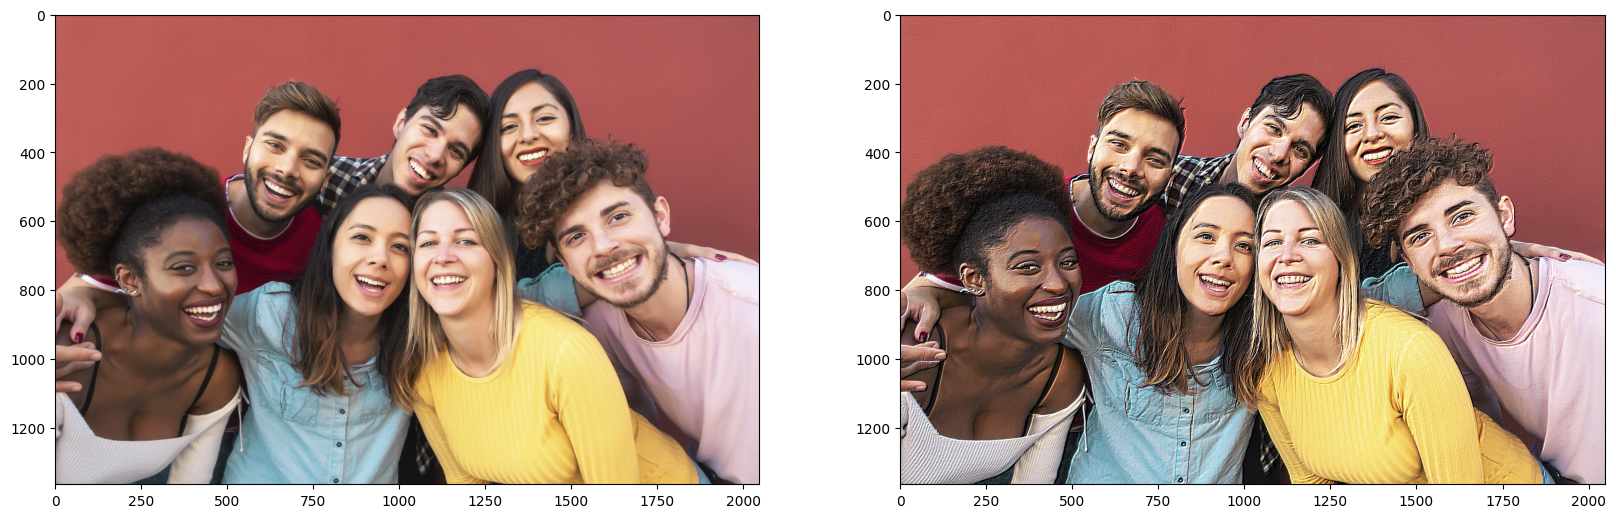

In [47]:
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

emboss_image = cv2.filter2D(image, -1, emboss_kernel)
emboss_rgb = cv2.cvtColor(emboss_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image_rgb)
axs[1].imshow(emboss_rgb)
plt.show()

histogram equilisation

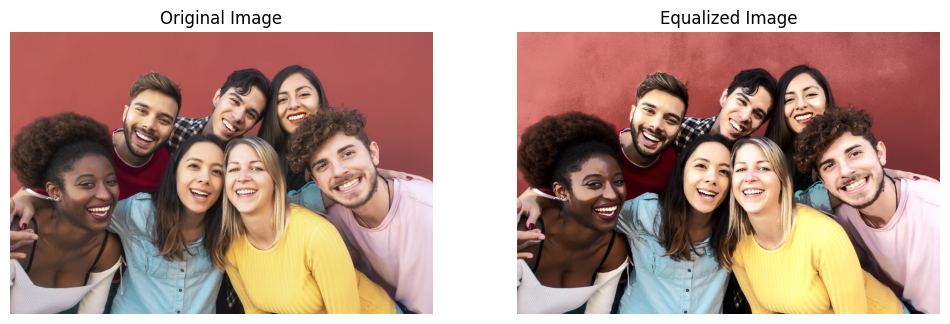

In [56]:
# Convert the image to the YUV color space
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Equalize the histogram of the Y channel
yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

# Convert the YUV image back to the BGR color space
equalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()
